In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

filename='output/smt/2019_07_22_smtfeatures.csv'

Number of datapoints: 13279


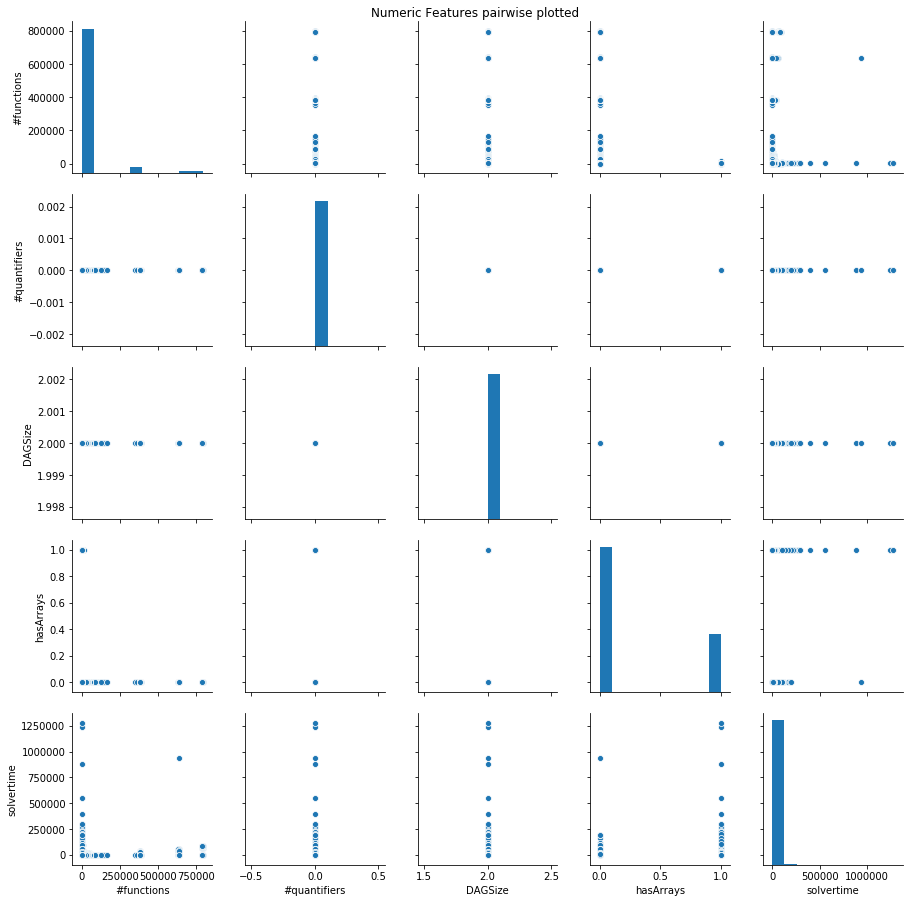

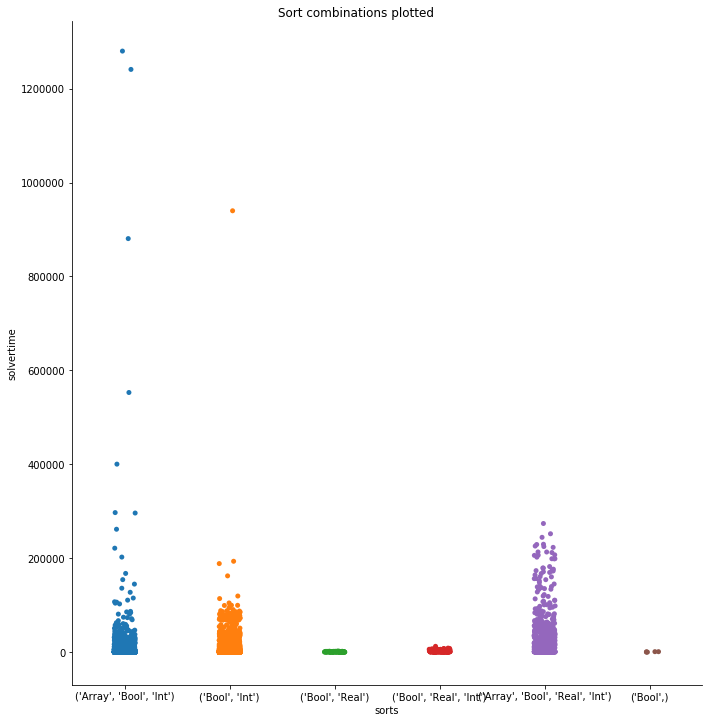

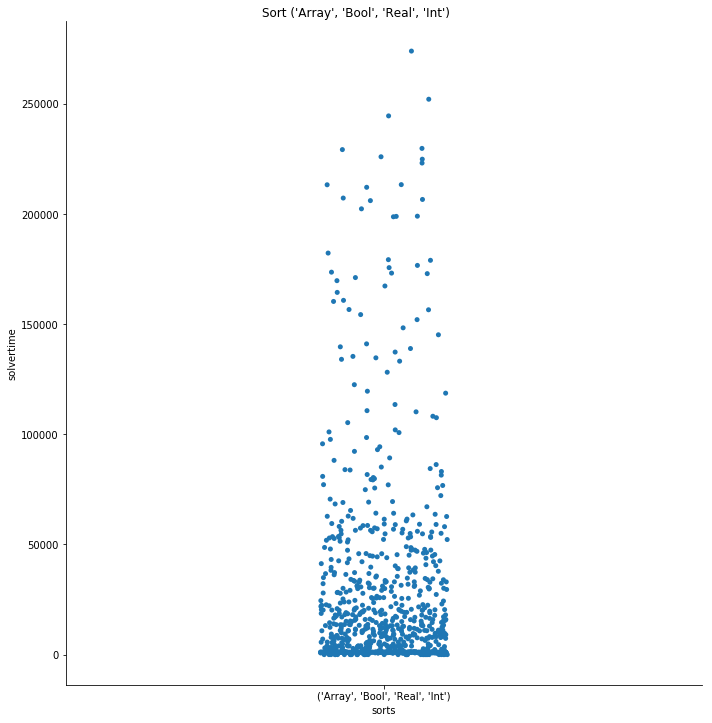

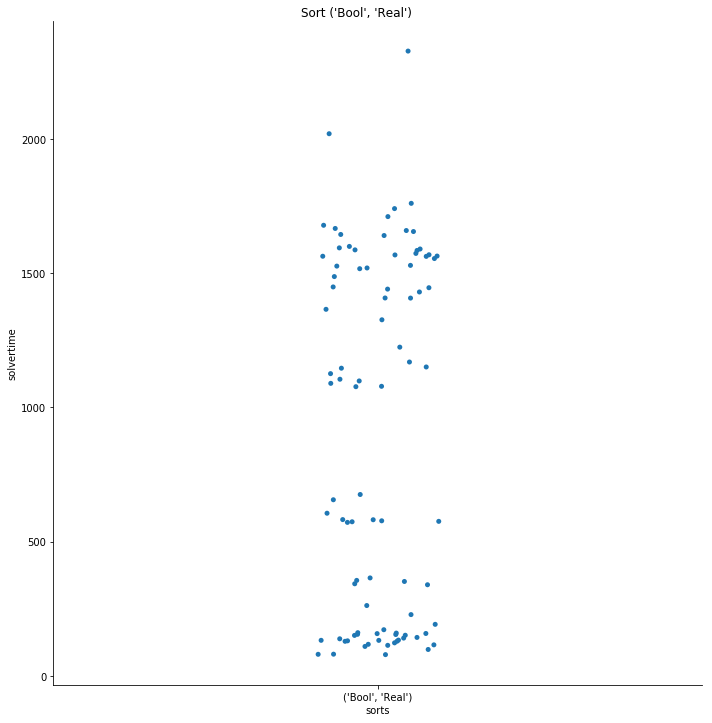

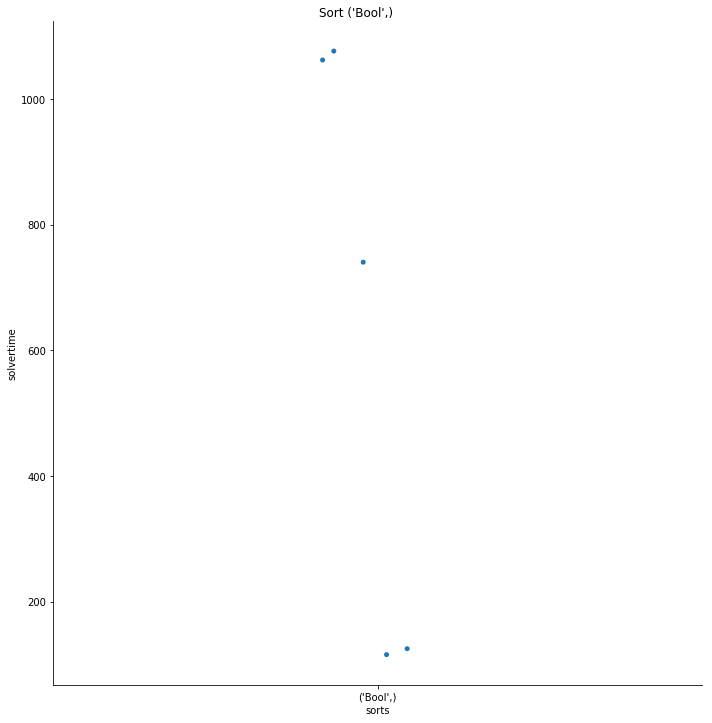

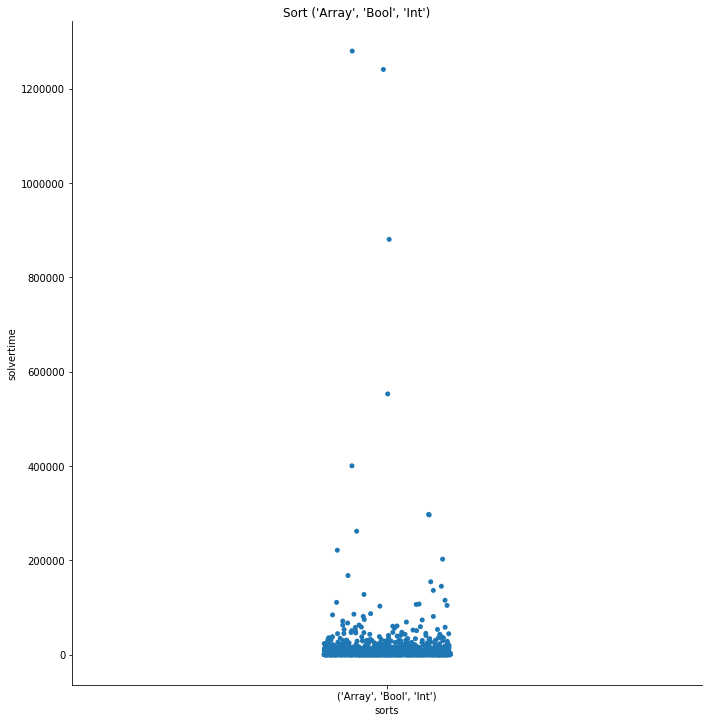

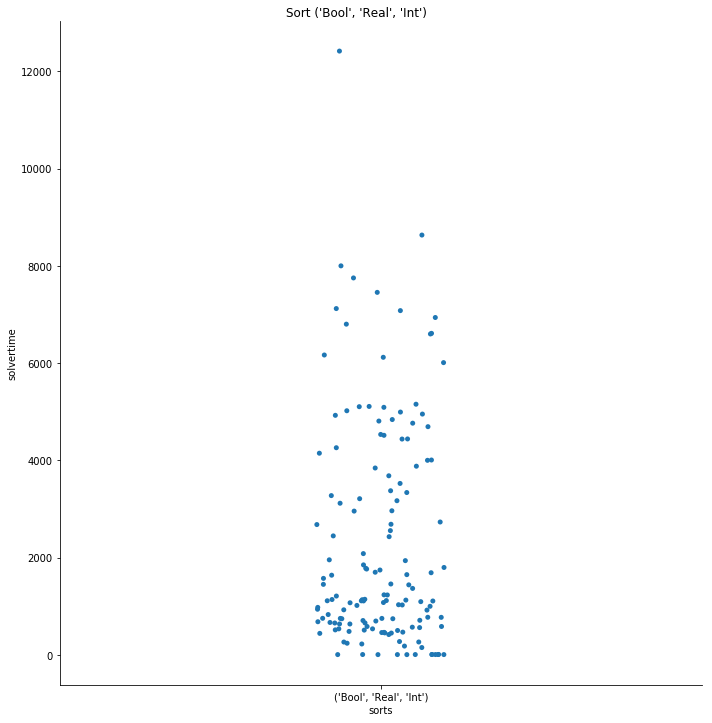

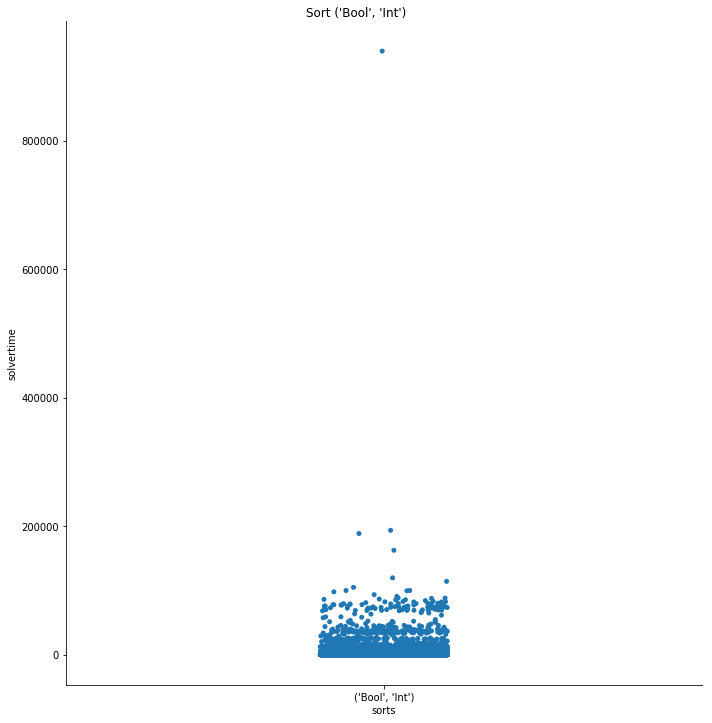

In [16]:
df = pd.read_csv(filename, delimiter=';')
print("Number of datapoints: %d" % df.shape[0])

# true / false to numeric values.
df['hasArrays'] = df['hasArrays'].replace({False: 0, True: 1})

sorts = set()
for i,s in df.iterrows():
    # transform string representation of list to an actual list.
    sorts_array = s['sorts'].strip('][').split(', ')
    # use tuples to have hashable
    df.at[i,'sorts'] = tuple(sorts_array)
    sorts.add(tuple(sorts_array))
    
feature_names = ['#functions', '#quantifiers','DAGSize','hasArrays', 'solvertime']
df_filtered = df[feature_names]
pairplot = sns.pairplot(df_filtered)
pairplot.fig.suptitle("Numeric Features pairwise plotted", y=1)

sorts_plot = sns.catplot(x="sorts", y="solvertime", data=df,  height=10, aspect=1,);
sorts_plot.fig.suptitle("Sort combinations plotted", y=1)

for sort in sorts:
    sort_only = df[df.sorts==sort]
    plot = sns.catplot(x="sorts", y="solvertime", data=sort_only,  height=10, aspect=1,);
    plot.fig.suptitle("Sort %s" % str(sort) , y=1)

    
